# MODEL 2: MATH SCORES CLASSIFICATION WITH ONLY ONE MIDTERM SCORES

# PART A: DATA LOADING, SETUP, TRANSFORMATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib
#import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## 1a. DATA TRANSFORMATION

In [2]:
# initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/data/student"
df = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
print("number of points and features in the data", df.shape)
df.head(5)

number of points and features in the data (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['performance'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'performance'] = 'good' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'performance'] = 'fair' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'performance'] = 'poor' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,performance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [4]:
# drop final score and midterm 2 score columns because we don't use it
df.drop(columns=['G2', 'G3'], inplace=True)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,performance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,fair


## 1b. SEPARATE FEATURE AND TARGET VARIABLE

In [5]:
# separate feature and target variable
label = 'performance'
y = LabelEncoder().fit_transform(df[label])
df.drop(columns=[label],inplace=True)
X = df
ftr_names = X.columns
print(X.head())
print(y)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  G1  
0       no       no       4         3      4    1    1      3        6   5  
1      yes       no       5         3      3    1    1      3        4   5  
2      yes       no       4         3      2    2    3      3       10   7  
3      yes      yes       3         2      2    1    1      5        2  15  
4       no       no       4         3      2    1    2      5        4   6  

[5 rows x 31 columns]
[2 2 0 1 0 1 0 2 1 1 2 0 0 0

## 1c. CHECK BALANCE/BASELINE

In [6]:
classes, counts = np.unique(y,return_counts=True)
baseline = np.max(counts/len(y))
print('balance/baseline:',baseline )

balance/baseline: 0.4860759493670886


# PART B: MACHINE LEARNING MODELS & PIPELINE

# 1. Logistic Regression

## 1a. HYPERPARAMETER TUNING

In [7]:
def ML_pipeline_kfold_GridSearchCV_logreg(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    ordinal_ftrs = ['Medu', 'Fedu', 'health','freetime', 'goout','famrel' 'Dalc', 'Walc', 
                'traveltime','studytime', 'failures'] #already pre processed
    label = ['G3'] #already preprocessed
   
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    #make ML pipeline
    pipe = make_pipeline(preprocessor, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [8]:
import pickle
test_scores = []

for i in range(5):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/onlyG1math/logreg/onlyG1math_logreg_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean = []
model_std = []
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/onlyG1math/logreg/onlyG1math_logreg_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'logisticregression__C': 0.517947467923121}
0
best CV score: 0.75
test score: 0.810126582278481
random state 2
{'logisticregression__C': 100.0}
1
best CV score: 0.7658730158730158
test score: 0.6962025316455697
random state 3
{'logisticregression__C': 0.517947467923121}
2
best CV score: 0.7532738095238096
test score: 0.7341772151898734
random state 4
{'logisticregression__C': 0.517947467923121}
3
best CV score: 0.7594742063492064
test score: 0.7468354430379747
random state 5
{'logisticregression__C': 0.517947467923121}
4
best CV score: 0.7687003968253968
test score: 0.7088607594936709
test accuracy: 0.739 +/- 0.04
[0.739]
[0.04]


In [9]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_logreg(X,y,0*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params = []
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.75
0.810126582278481
{'logisticregression__C': 0.517947467923121}
best params for ML models: [{'logisticregression__C': 0.517947467923121}]


In [10]:
# save the output so I can use it later
fname = '../results/onlyG1math/logreg/onlyG1math_logreg_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 1b. FEATURE IMPORTANCE

## 1bi. PERTURBATION

In [11]:
# load saved data
for i in range(5):
    import pickle
    fname = '../results/onlyG1math/logreg/onlyG1math_logreg_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [12]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', mean_test_scores)
print('test baseline = ', baseline)
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.739
test baseline =  0.4860759493670886
shuffling school
   shuffled test score: 0.709 +/- 0.0
shuffling sex
   shuffled test score: 0.709 +/- 0.0
shuffling age
   shuffled test score: 0.719 +/- 0.017
shuffling address
   shuffled test score: 0.711 +/- 0.011
shuffling famsize
   shuffled test score: 0.709 +/- 0.0
shuffling Pstatus
   shuffled test score: 0.709 +/- 0.0
shuffling Medu
   shuffled test score: 0.709 +/- 0.0
shuffling Fedu
   shuffled test score: 0.709 +/- 0.0
shuffling Mjob
   shuffled test score: 0.72 +/- 0.004
shuffling Fjob
   shuffled test score: 0.72 +/- 0.013
shuffling reason
   shuffled test score: 0.732 +/- 0.011
shuffling guardian
   shuffled test score: 0.71 +/- 0.004
shuffling traveltime
   shuffled test score: 0.709 +/- 0.0
shuffling studytime
   shuffled test score: 0.709 +/- 0.0
shuffling failures
   shuffled test score: 0.709 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.709 +/- 0.0
shuffling famsup
   shuffled test score: 0.709 +/- 0

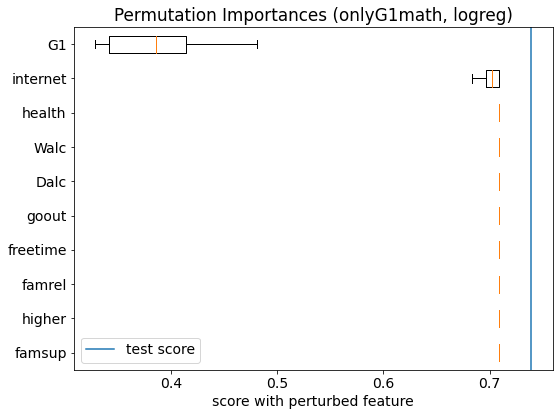

In [13]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (onlyG1math, logreg)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/logreg/'
plt.savefig(path + 'logreg_perturb.png')
plt.show()

## 1bii. COEFFICIENTS

In [14]:
def ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # StratifiedKFold
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    ordinal_ftrs = ['Medu', 'Fedu', 'health','freetime', 'goout','famrel' 'Dalc', 'Walc', 
                'traveltime','studytime', 'failures'] #already pre processed
    label = ['G3'] #already preprocessed
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # Standard Scaler to standardized
    final_scaler = StandardScaler()
    
    pipe = make_pipeline(preprocessor, final_scaler, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [15]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.7691468253968253
0.7088607594936709
{'logisticregression__C': 0.517947467923121}


In [16]:
# save the output so I can use it later
fname = '../results/onlyG1math/logreg/onlyG1math_logreg_coeff'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [17]:
# load saved data
import pickle
fname = '../results/onlyG1math/logreg/onlyG1math_logreg_coeff'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

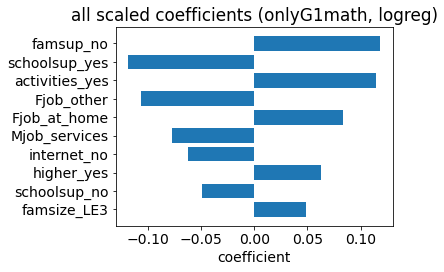

In [18]:
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('all scaled coefficients (onlyG1math, logreg)')
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/logreg/'
plt.savefig(path + 'logreg_coeff.png',bbox_inches='tight')
plt.show()

## 1biii. SHAP

In [19]:
# load saved data
import pickle
fname = '../results/onlyG1math/logreg/onlyG1math_logreg_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [20]:
import shap
shap.initjs() # required for visualizations later on
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
#create explainer
explainer = shap.LinearExplainer(grid.best_estimator_[1], X_test_transformed)
#calculate shap values
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(79, 46)
(3, 79, 46)


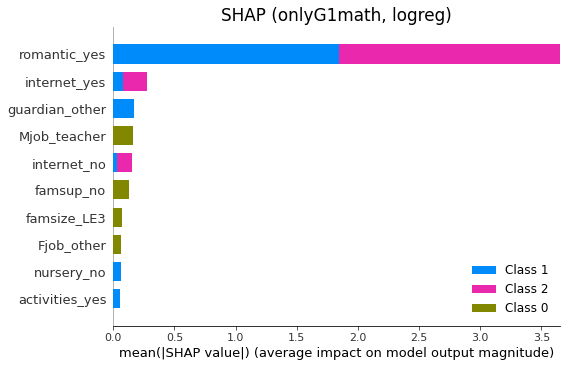

In [21]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, max_display=10, show=False)
plt.title("SHAP (onlyG1math, logreg)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/logreg/'
plt.savefig(path + 'logreg_shap.png',bbox_inches='tight')
plt.show()

In [22]:
ind = 0
print(explainer.expected_value[1])
shap.force_plot(
    explainer.expected_value[1], shap_values[1][ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

-0.9999905147234864


In [23]:
ind = 10
print(explainer.expected_value[1])
shap.force_plot(
    explainer.expected_value[1], shap_values[1][ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

-0.9999905147234864


In [24]:
ind = 0
print(explainer.expected_value[2])
shap.force_plot(
    explainer.expected_value[2], shap_values[2][ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

0.1939548640590516


In [25]:
ind = 10
print(explainer.expected_value[2])
shap.force_plot(
    explainer.expected_value[2], shap_values[2][ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
)

0.1939548640590516


## 1c. CONFUSION MATRIX

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [27]:
# load saved data
import pickle
fname = '../results/onlyG1math/logreg/onlyG1math_logreg_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[28  1  2]
 [ 6 12  0]
 [ 6  0 24]]


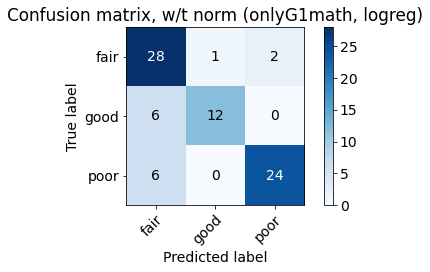

normalized confusion matrix : [[0.90322581 0.03225806 0.06451613]
 [0.33333333 0.66666667 0.        ]
 [0.2        0.         0.8       ]]


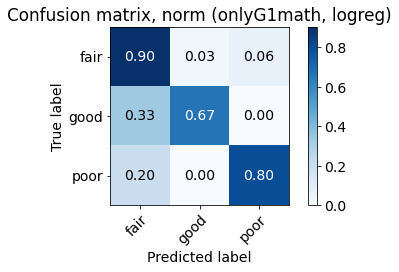

In [28]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=["fair", "good", "poor"])
plt.title('Confusion matrix, w/t norm (onlyG1math, logreg)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/logreg/'
plt.savefig(path + 'logreg_cm.png')
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=["fair", "good", "poor"],normalize= True )
plt.title('Confusion matrix, norm (onlyG1math, logreg)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/logreg/'
plt.savefig(path + 'logreg_cmnorm.png')
plt.show()

# 2. RANDOM FOREST CLASSIFIER

## 2a. HYPERPARAMETER TUNING

In [29]:
def ML_pipeline_kfold_GridSearchCV_rf(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    ordinal_ftrs = ['Medu', 'Fedu', 'health','freetime', 'goout','famrel' 'Dalc', 'Walc', 
                'traveltime','studytime', 'failures'] #already pre processed
    label = ['G3'] #already preprocessed
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators = 100,random_state=random_state))

    # the parameter(s) we want to tune
    param_grid = {'randomforestclassifier__max_depth': np.linspace(2,30,num=9,dtype=int),
                 'randomforestclassifier__max_features': np.linspace(0.25,1,5)}
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [30]:
import pickle
test_scores = []

for i in range(5):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_rf(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/onlyG1math/rf/onlyG1math_rf_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/onlyG1math/rf/onlyG1math_rf_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 0.4375}
0
best CV score: 0.800545634920635
test score: 0.7215189873417721
random state 2
{'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': 0.625}
1
best CV score: 0.7848214285714286
test score: 0.7341772151898734
random state 3
{'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.8125}
2
best CV score: 0.7753472222222222
test score: 0.7974683544303798
random state 4
{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}
3
best CV score: 0.7499007936507937
test score: 0.7088607594936709
random state 5
{'randomforestclassifier__max_depth': 16, 'randomforestclassifier__max_features': 0.625}
4
best CV score: 0.8100198412698413
test score: 0.759493670886076
test accuracy: 0.744 +/- 0.031
[0.739, 0.744]
[0.04, 0.031]


In [31]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_rf(X,y,2*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.7753472222222222
0.7974683544303798
{'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.8125}
best params for ML models: [{'logisticregression__C': 0.517947467923121}, {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.8125}]


In [32]:
# save the output so I can use it later
fname = '../results/onlyG1math/rf/onlyG1math_rf_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 2b. FEATURE IMPORTANCE

## 2bi. PERTURBATION

In [33]:
# load saved data
for i in range(5):
    import pickle
    fname = '../results/onlyG1math/rf/onlyG1math_rf_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [34]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', mean_test_scores)
print('test baseline = ', baseline)
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.744
test baseline =  0.4860759493670886
shuffling school
   shuffled test score: 0.758 +/- 0.004
shuffling sex
   shuffled test score: 0.765 +/- 0.006
shuffling age
   shuffled test score: 0.749 +/- 0.028
shuffling address
   shuffled test score: 0.747 +/- 0.008
shuffling famsize
   shuffled test score: 0.753 +/- 0.015
shuffling Pstatus
   shuffled test score: 0.759 +/- 0.0
shuffling Medu
   shuffled test score: 0.759 +/- 0.0
shuffling Fedu
   shuffled test score: 0.759 +/- 0.0
shuffling Mjob
   shuffled test score: 0.741 +/- 0.008
shuffling Fjob
   shuffled test score: 0.742 +/- 0.012
shuffling reason
   shuffled test score: 0.746 +/- 0.014
shuffling guardian
   shuffled test score: 0.763 +/- 0.01
shuffling traveltime
   shuffled test score: 0.759 +/- 0.0
shuffling studytime
   shuffled test score: 0.759 +/- 0.0
shuffling failures
   shuffled test score: 0.759 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.746 +/- 0.007
shuffling famsup
   shuffled test score: 0

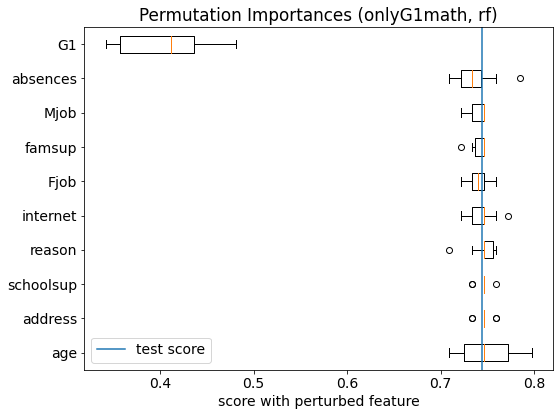

In [35]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (onlyG1math, rf)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/rf/'
plt.savefig(path + 'rf_perturb.png')
plt.show()

## 2bii. DECISION TREE-NATIVE FEATURE IMPORTANCES METRICS

In [36]:
# load saved data
import pickle
fname = '../results/onlyG1math/rf/onlyG1math_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

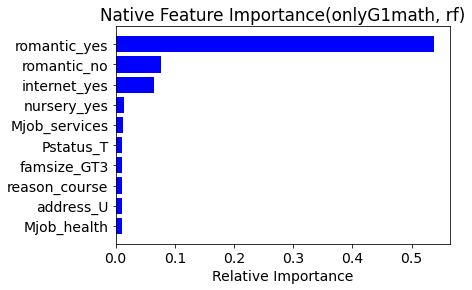

In [37]:
importances = grid.best_estimator_[1].feature_importances_
indices = np.argsort(importances)[-10:]
features = feature_names
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Native Feature Importance(onlyG1math, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/rf/'
plt.savefig(path + 'rf_ftnative.png',bbox_inches='tight')
plt.show()

## 2biii. SHAP

In [38]:
# load saved data
import pickle
fname = '../results/onlyG1math/rf/onlyG1math_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [39]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values 
shap_values = explainer.shap_values(X_test_transformed, check_additivity=False)
print(np.shape(shap_values))

(79, 46)
(3, 79, 46)


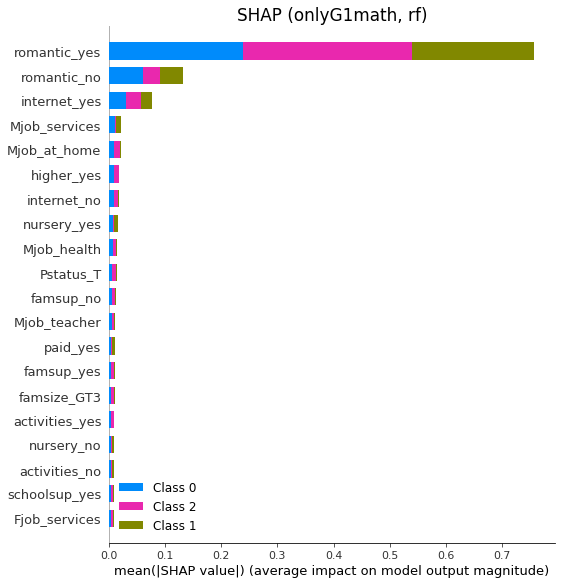

In [40]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names, show=False)
plt.title("SHAP (onlyG1math, rf)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/rf/'
plt.savefig(path + 'rf_shap.png',bbox_inches='tight')
plt.show()

In [41]:
index = 0 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.458354430379747


In [42]:
index = 25 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.458354430379747


In [43]:
index = 50 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.458354430379747


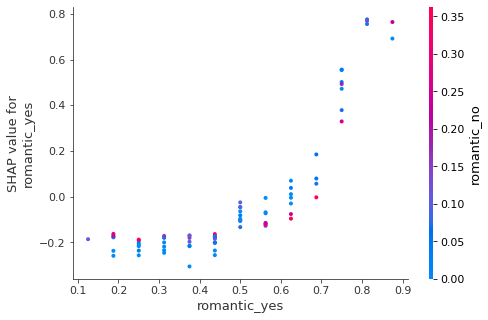

In [44]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

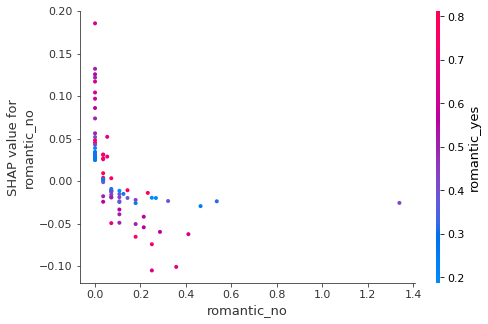

In [45]:
ftr = 'romantic_no'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

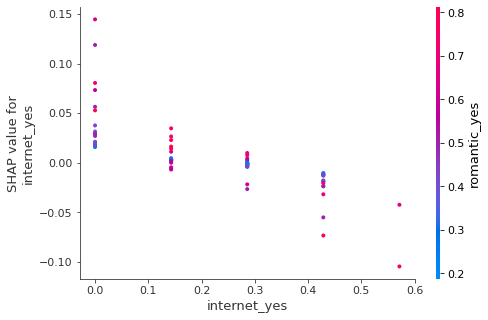

In [46]:
ftr = 'internet_yes'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names)

## 2c. CONFUSION MATRIX

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [48]:
# load saved data
import pickle
fname = '../results/onlyG1math/rf/onlyG1math_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[34  4  8]
 [ 1  8  0]
 [ 3  0 21]]


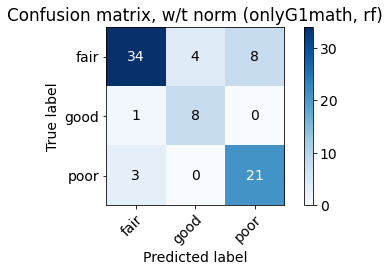

normalized confusion matrix : [[0.73913043 0.08695652 0.17391304]
 [0.11111111 0.88888889 0.        ]
 [0.125      0.         0.875     ]]


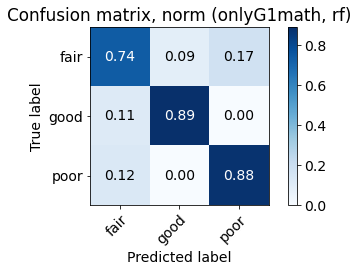

In [49]:
y_pred = grid.best_estimator_.predict(X_test)
#not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=["fair", "good", "poor"])
plt.title('Confusion matrix, w/t norm (onlyG1math, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/rf/'
plt.savefig(path + 'rf_cm.png')
plt.show()

#normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=["fair", "good", "poor"],normalize= True )
plt.title('Confusion matrix, norm (onlyG1math, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/rf/'
plt.savefig(path + 'rf_cmnorm.png')
plt.show()

# 3. SVC

## 3a. HYPERPARAMETER TUNING

In [50]:
def ML_pipeline_kfold_GridSearchCV_svc(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    # encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    ordinal_ftrs = ['Medu', 'Fedu', 'health','freetime', 'goout','famrel' 'Dalc', 'Walc', 
                'traveltime','studytime', 'failures'] #already pre processed
    label = ['G3'] #already preprocessed
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor,SVC(random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [51]:
import pickle
test_scores = []

for i in range(5):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_svc(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/onlyG1math/svc/onlyG1math_svc_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/onlyG1math/svc/onlyG1math_svc_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'svc__C': 10000.0, 'svc__gamma': 0.001}
0
best CV score: 0.7244543650793651
test score: 0.7848101265822784
random state 2
{'svc__C': 10000.0, 'svc__gamma': 0.001}
1
best CV score: 0.75
test score: 0.7215189873417721
random state 3
{'svc__C': 1000.0, 'svc__gamma': 0.001}
2
best CV score: 0.7121527777777777
test score: 0.7215189873417721
random state 4
{'svc__C': 10000.0, 'svc__gamma': 0.001}
3
best CV score: 0.7028273809523811
test score: 0.7215189873417721
random state 5
{'svc__C': 10000.0, 'svc__gamma': 0.001}
4
best CV score: 0.7244047619047619
test score: 0.7215189873417721
test accuracy: 0.734 +/- 0.025
[0.739, 0.744, 0.734]
[0.04, 0.031, 0.025]


In [52]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_svc(X,y,0*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.7244543650793651
0.7848101265822784
{'svc__C': 10000.0, 'svc__gamma': 0.001}
best params for ML models: [{'logisticregression__C': 0.517947467923121}, {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.8125}, {'svc__C': 10000.0, 'svc__gamma': 0.001}]


In [53]:
# save the output so I can use it later
fname = '../results/onlyG1math/svc/onlyG1math_svc_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 3b. FEATURE IMPORTANCE

## 3bi. PERTURBATION

In [54]:
# load saved data
import pickle
for i in range(5):
    fname = '../results/onlyG1math/svc/onlyG1math_svc_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [55]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', mean_test_scores)
print('test baseline = ', baseline)
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.734
test baseline =  0.4860759493670886
shuffling school
   shuffled test score: 0.723 +/- 0.007
shuffling sex
   shuffled test score: 0.727 +/- 0.006
shuffling age
   shuffled test score: 0.715 +/- 0.037
shuffling address
   shuffled test score: 0.723 +/- 0.011
shuffling famsize
   shuffled test score: 0.71 +/- 0.013
shuffling Pstatus
   shuffled test score: 0.713 +/- 0.008
shuffling Medu
   shuffled test score: 0.722 +/- 0.0
shuffling Fedu
   shuffled test score: 0.722 +/- 0.0
shuffling Mjob
   shuffled test score: 0.706 +/- 0.019
shuffling Fjob
   shuffled test score: 0.72 +/- 0.016
shuffling reason
   shuffled test score: 0.694 +/- 0.019
shuffling guardian
   shuffled test score: 0.725 +/- 0.013
shuffling traveltime
   shuffled test score: 0.722 +/- 0.0
shuffling studytime
   shuffled test score: 0.722 +/- 0.0
shuffling failures
   shuffled test score: 0.722 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.701 +/- 0.008
shuffling famsup
   shuffled test score: 

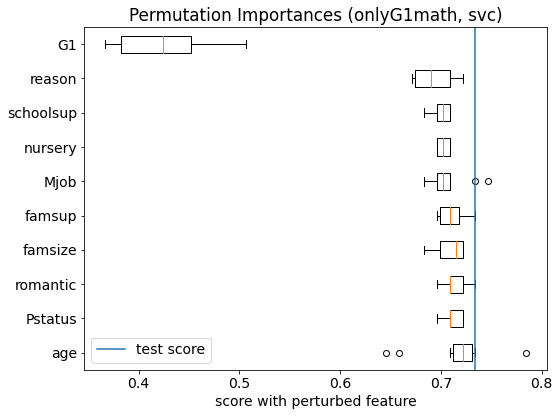

In [56]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (onlyG1math, svc)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/svc/'
plt.savefig(path + 'svc_perturb.png')
plt.show()

## 3bii. SHAP

In [57]:
# load saved data
import pickle
fname = '../results/onlyG1math/svc/onlyG1math_svc_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [58]:
import shap
shap.initjs() # required for visualizations later on
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
# create the explainer
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict, X_test_transformed[:10])
print(np.shape(X_test_transformed))
# calculate shap values
shap_values = explainer.shap_values(X_test_transformed[:10])
print(np.shape(shap_values))

(79, 46)



(10, 46)


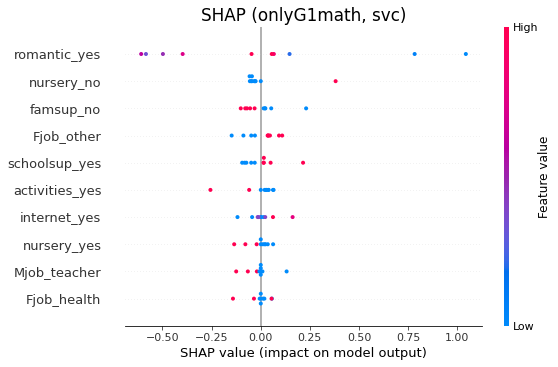

In [59]:
import shap
shap.initjs()
shap.summary_plot(shap_values, X_test_transformed[:10], feature_names=feature_names, max_display=10, show=False)
plt.title("SHAP (onlyG1math, svc)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/svc/'
plt.savefig(path + 'svc_shap.png',bbox_inches='tight')
plt.show()

In [60]:
index = 0 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9000000000000001


In [61]:
index = 4 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9000000000000001


In [62]:
index = 9 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names)

0.9000000000000001


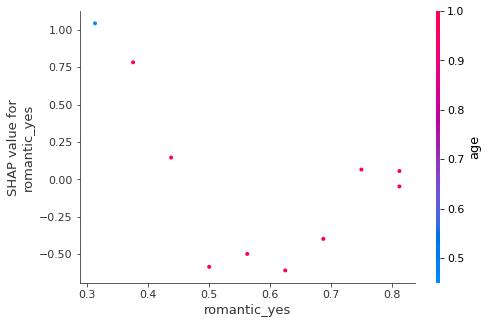

In [63]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:10], feature_names=feature_names)

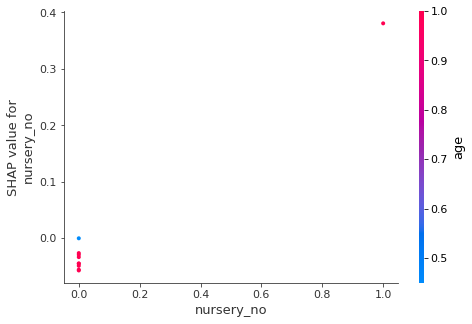

In [64]:
ftr = 'nursery_no'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:10], feature_names=feature_names)

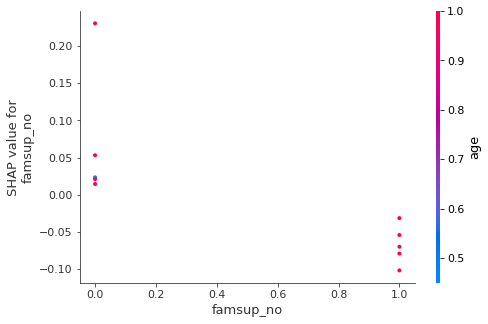

In [65]:
ftr = 'famsup_no'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:10], feature_names=feature_names)

## 3c. CONFUSION MATRIX

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [67]:
# load saved data
import pickle
fname = '../results/onlyG1math/svc/onlyG1math_svc_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[25  3  3]
 [ 5 13  0]
 [ 6  0 24]]


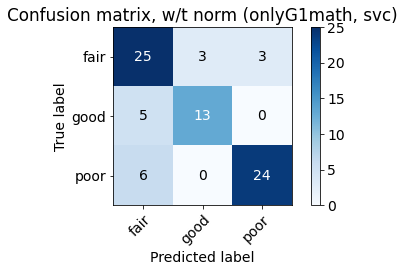

normalized confusion matrix : [[0.80645161 0.09677419 0.09677419]
 [0.27777778 0.72222222 0.        ]
 [0.2        0.         0.8       ]]


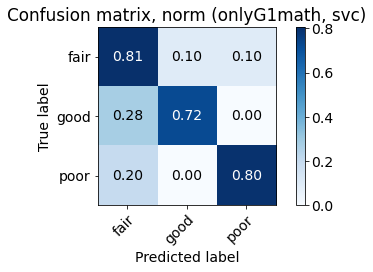

In [68]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=["fair", "good", "poor"])
plt.title('Confusion matrix, w/t norm (onlyG1math, svc)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/svc/'
plt.savefig(path + 'svc_cm.png')
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=["fair", "good", "poor"],normalize= True )
plt.title('Confusion matrix, norm (onlyG1math, svc)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/svc/'
plt.savefig(path + 'svc_cmnorm.png')
plt.show()

# PART C: SUMMARY

In [69]:
# load saved data
import pickle
fname = '../results/onlyG1math/logreg/onlyG1math_logreg_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [70]:
# load saved data
import pickle
fname = '../results/onlyG1math/rf/onlyG1math_rf_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [71]:
# load saved data
import pickle
fname = '../results/onlyG1math/svc/onlyG1math_svc_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [72]:
print(model_mean)
print(model_std)

[0.739, 0.744, 0.734]
[0.04, 0.031, 0.025]


In [73]:
# save the output so I can use it later
fname = '../results/onlyG1math/onlyG1math_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((model_mean, model_std), file)
file.close()

In [74]:
ML_models = ["logreg", 'rf', 'svc']

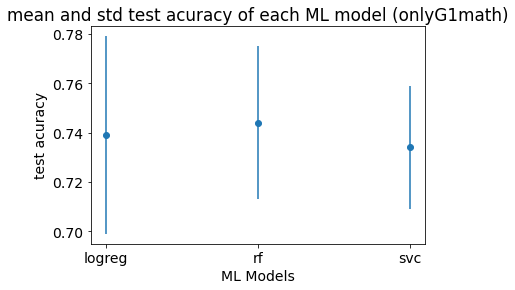

In [75]:
plt.errorbar(ML_models ,model_mean, yerr = model_std, fmt="o")
plt.xlabel("ML Models")
plt.ylabel("test acuracy")
plt.title("mean and std test acuracy of each ML model (onlyG1math)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_fa20_final_project/figures/onlyG1math/'
plt.savefig(path + 'onlyG1math_model_mean_std.png', bbox_inches='tight')

In [76]:
baseline 

0.4860759493670886

In [81]:
std_above_baseline = []
for i in range(3):
    std_abv_bsl = np.around(((model_mean[i] - baseline)/model_std[i]),3)
    std_above_baseline.append(std_abv_bsl)
std_above_baseline

[6.323, 8.32, 9.917]

In [82]:
# save the output so I can use it later
fname = '../results/onlyG1math/onlyG1math_std_abv_bsl'+'.save'
file = open(fname, 'wb')
pickle.dump((std_above_baseline), file)
file.close()

In [83]:
results = pd.DataFrame(ML_models)
results.rename(columns = {0:'ML_models'}, inplace = True) 
results["Mean_onlyG1math"] = model_mean
results["Std_onlyG1math"] = model_std
results["Std_abv_bsl_onlyG1math"] = std_above_baseline
results

,ML_models,Mean_onlyG1math,Std_onlyG1math,Std_abv_bsl_onlyG1math
0,logreg,0.739,0.040,6.323
1,rf,0.744,0.031,8.320
2,svc,0.734,0.025,9.917


In [84]:
print("best params for ML models:", best_params)

best params for ML models: [{'logisticregression__C': 0.517947467923121}, {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.8125}, {'svc__C': 10000.0, 'svc__gamma': 0.001}]


In [85]:
# save the output so I can use it later
fname = '../results/onlyG1math/onlyG1math_best_params'+'.save'
file = open(fname, 'wb')
pickle.dump((best_params), file)
file.close()